# 시계열 데이터

-----

판다스에서 시계열 자료형은 Timestamp와 Period 두가지 타입이 있습니다.

- Timestamp 자료형은 `to_datetime()`함수로 생성가능하며 날짜형태의 자료형을 시계열 타입으로 변환합니다.

- period 자료형은 Timestamp(datetime)객체를 다시 기간에 따른 자료형으로 이용하고자 할때 사용합니다.

# 2. 자료형의 시계열 객체 변환 : to_datetime(), to_period()

먼저 시계열 데이터의 대표주자인 주식 데이터를 로드합니다.

In [ ]:
!pip install finance-datareader

In [1]:
import pandas as pd
import FinanceDataReader as fdr

df = fdr.DataReader('QQQ, SPY')
df.reset_index(inplace=True)
df["Date"] = df["Date"].astype(object)
df.head()

,Date,QQQ,SPY
0,1993-01-29,NaN,24.684120
1,1993-02-01,NaN,24.859661
2,1993-02-02,NaN,24.912334
3,1993-02-03,NaN,25.175682
4,1993-02-04,NaN,25.281010


In [4]:
df["Date"] = df["Date"].astype(object)

<Axes: >

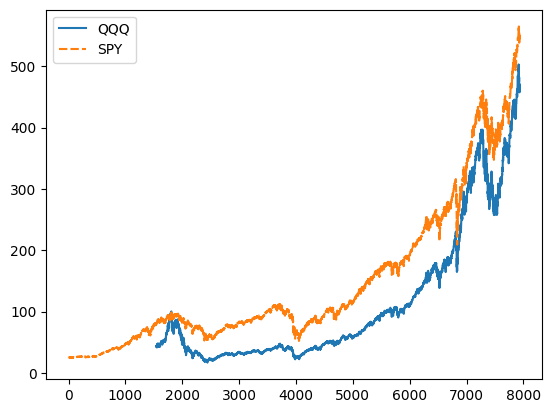

In [5]:
import seaborn as sns

sns.lineplot(df)

`to_datetime()` 함수를 이용해서 Date컬럼을 시계열 객체(Timestamp)로 변환해봅시다.

In [6]:
df['new_date'] = pd.to_datetime(df['Date'])
df.head()

,Date,QQQ,SPY,new_date
0,1993-01-29 00:00:00,NaN,24.684120,1993-01-29
1,1993-02-01 00:00:00,NaN,24.859661,1993-02-01
2,1993-02-02 00:00:00,NaN,24.912334,1993-02-02
3,1993-02-03 00:00:00,NaN,25.175682,1993-02-03
4,1993-02-04 00:00:00,NaN,25.281010,1993-02-04


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7933 non-null   object        
 1   QQQ       6391 non-null   float64       
 2   SPY       7933 non-null   float64       
 3   new_date  7933 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 248.0+ KB


In [8]:
type(df.new_date[0])

pandas._libs.tslibs.timestamps.Timestamp

to_datetime 함수를 이용해 object(문자)형 데이터였던 Date 컬럼을 시계열객체로 변경했습니다.

info 메소드의 결과로 new_date 컬럼의 Dtype은 datetime으로 시계열객체가 된 것을 확인할 수 있습니다.

마찬가지로 new_date의 첫번째 row의 type을 확인한 결과 timestamp로 나타나는 것을 알 수 있습니다.

이제 기존 Date열은 삭제하고 new_date를 인덱스로 지정하겠습니다.

In [9]:
df.drop('Date', axis=1, inplace=True)
df.set_index('new_date', inplace=True)

In [12]:
df.head()

,QQQ,SPY
new_date,,
1993-01-29,NaN,24.684120
1993-02-01,NaN,24.859661
1993-02-02,NaN,24.912334
1993-02-03,NaN,25.175682
1993-02-04,NaN,25.281010


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7933 entries, 1993-01-29 to 2024-08-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QQQ     6391 non-null   float64
 1   SPY     7933 non-null   float64
dtypes: float64(2)
memory usage: 185.9 KB


데이터요약정보에서 인덱스가 `DatetimeIndex`로 나타나는 것을 알 수 있고 2020-03-02부터 2020-07-30으로 나타나는 것을 알 수있습니다.

이번에는 Timestamp와 Period의 차이를 알아보겠습니다.

In [14]:
# Timestamp를 Period로 변환

dates = ['2021-01-01', '2021-02-01', '2021-03-01']

ts_dates = pd.to_datetime(dates)

print(ts_dates)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01'], dtype='datetime64[ns]', freq=None)


In [15]:
# Timestamp를 Period변환
pr_day = ts_dates.to_period(freq='D') # 1일의 기간
print(pr_day)

PeriodIndex(['2021-01-01', '2021-02-01', '2021-03-01'], dtype='period[D]')


In [17]:
pr_month = ts_dates.to_period(freq='M') # 1개월의 기간
print(pr_month)

PeriodIndex(['2021-01', '2021-02', '2021-03'], dtype='period[M]')


In [1]:
pr_year = ts_dates.to_period(freq='A') # 1년의 기간
print(pr_year)

NameError: name 'ts_dates' is not defined

이처럼 Period 객체는 `to_period(freq='기간인수')`를 통해 datetime 변수에 대해 어떤 기간에 따른 자료형을 생성하고자 할 때 사용됩니다.

이는 바로 아무 자료형에나 사용할 수 없고 datetime 타입에 대해 적용 가능합니다.

아래는 freq에 사용할 수 있는 다양한 기간인수입니다.

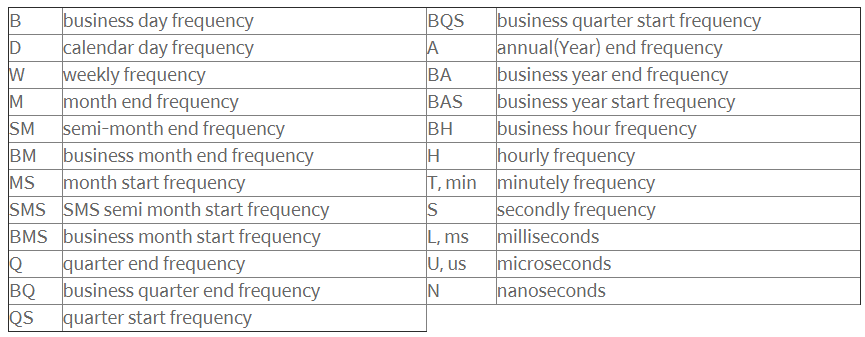

# 시계열 데이터 만들기 : date_range(), period_range()

---

## Timestamp 배열

Timestamp를 배열하는 `date_range`함수는 내장함수 range() 함수와 동일한 개념입니다.

다음과 같이 옵션을 지정하면 원하는 일정 기간의 Timestamp(datetime)배열을 얻을 수 있습니다.

In [42]:
ts_ms = pd.date_range(start = '2020-01-01', # 날짜 범위 시작
                      end = None,          # 날짜 범위 끝
                      periods = 20,        # 생성할 Timestamp 수
                      freq ='B',           # 시간 간격 (B: 평일)
                      tz = 'Asia/Seoul')   # 시간대(timezone)

print(ts_ms)

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-01-02 00:00:00+09:00',
               '2020-01-03 00:00:00+09:00', '2020-01-06 00:00:00+09:00',
               '2020-01-07 00:00:00+09:00', '2020-01-08 00:00:00+09:00',
               '2020-01-09 00:00:00+09:00', '2020-01-10 00:00:00+09:00',
               '2020-01-13 00:00:00+09:00', '2020-01-14 00:00:00+09:00',
               '2020-01-15 00:00:00+09:00', '2020-01-16 00:00:00+09:00',
               '2020-01-17 00:00:00+09:00', '2020-01-20 00:00:00+09:00',
               '2020-01-21 00:00:00+09:00', '2020-01-22 00:00:00+09:00',
               '2020-01-23 00:00:00+09:00', '2020-01-24 00:00:00+09:00',
               '2020-01-27 00:00:00+09:00', '2020-01-28 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='B')


## Period 배열

마찬가지로 Period 배열을 생성해주는 `period_range()` 함수를 알아봅시다.

Timestamp와의 차이점은 Period는 기간을 나타내는 자료형으로 배열을 적용할 때 `freq=` 옵션은 기간의 단위를 의미한다는 점입니다.

In [46]:
# 1개월 길이

pr_m = pd.period_range(start='2020-01-01', end=None, periods=3, freq='D')
pr_m

PeriodIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='period[D]', freq='D')

In [48]:
# 1시간 길이

pr_h = pd.period_range(start='2020-01-01', end=None, periods=3, freq='H')
pr_h

PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[H]', freq='H')

In [50]:
# 2시간 길이

pr_2h = pd.period_range(start='2020-01-01', end=None, periods=3, freq='2H')
pr_2h

PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2H]', freq='2H')

# 시계열데이터 활용

-----

## 날짜 데이터 분리: dt.year,  dt.month, dt.day

In [54]:
df = pd.read_csv("../data/stock.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-03-02,55500,53600,54300,55000,30403412,55000
1,2020-03-03,56900,55100,56700,55400,30330295,55400
2,2020-03-04,57600,54600,54800,57400,24765728,57400
3,2020-03-05,58000,56700,57600,57800,21698990,57800
4,2020-03-06,57200,56200,56500,56500,18716656,56500
...,...,...,...,...,...,...,...
100,2020-07-24,54400,53700,54000,54200,10994535,54200
101,2020-07-27,55700,54300,54300,55600,21054421,55600
102,2020-07-28,58800,56400,57000,58600,48431566,58600
103,2020-07-29,60400,58600,60300,59000,36476611,59000


datetime 타입에 적용하는 `dt`접근자를 활용해 연(year), 월(month), 일(day)을 추출해봅시다.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [61]:
df['Date'] = pd.to_datetime(df['Date'])

In [62]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day
0,2020-03-02,55500,53600,54300,55000,30403412,55000,2020,3,2
1,2020-03-03,56900,55100,56700,55400,30330295,55400,2020,3,3
2,2020-03-04,57600,54600,54800,57400,24765728,57400,2020,3,4
3,2020-03-05,58000,56700,57600,57800,21698990,57800,2020,3,5
4,2020-03-06,57200,56200,56500,56500,18716656,56500,2020,3,6


여기서 주의할 점은 dt 접근자를 사용하기 위해선 Date 컬럼을 to_datetime 함수를 이용해 시계열 타입으로 변환해야합니다.

## 날짜 인덱스 활용

----

시계열 타입의 컬럼을 인덱스로 활용하는 방법을 알아보겠습니다.

In [63]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day
0,2020-03-02,55500,53600,54300,55000,30403412,55000,2020,3,2
1,2020-03-03,56900,55100,56700,55400,30330295,55400,2020,3,3
2,2020-03-04,57600,54600,54800,57400,24765728,57400,2020,3,4
3,2020-03-05,58000,56700,57600,57800,21698990,57800,2020,3,5
4,2020-03-06,57200,56200,56500,56500,18716656,56500,2020,3,6
...,...,...,...,...,...,...,...,...,...,...
100,2020-07-24,54400,53700,54000,54200,10994535,54200,2020,7,24
101,2020-07-27,55700,54300,54300,55600,21054421,55600,2020,7,27
102,2020-07-28,58800,56400,57000,58600,48431566,58600,2020,7,28
103,2020-07-29,60400,58600,60300,59000,36476611,59000,2020,7,29


In [66]:
df.set_index(df['Date'], inplace=True)
df

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day
Date,,,,,,,,,,
2020-03-02,2020-03-02,55500,53600,54300,55000,30403412,55000,2020,3,2
2020-03-03,2020-03-03,56900,55100,56700,55400,30330295,55400,2020,3,3
2020-03-04,2020-03-04,57600,54600,54800,57400,24765728,57400,2020,3,4
2020-03-05,2020-03-05,58000,56700,57600,57800,21698990,57800,2020,3,5
2020-03-06,2020-03-06,57200,56200,56500,56500,18716656,56500,2020,3,6
...,...,...,...,...,...,...,...,...,...,...
2020-07-24,2020-07-24,54400,53700,54000,54200,10994535,54200,2020,7,24
2020-07-27,2020-07-27,55700,54300,54300,55600,21054421,55600,2020,7,27
2020-07-28,2020-07-28,58800,56400,57000,58600,48431566,58600,2020,7,28


시계열 타입이 인덱스인 경우에는 꼭 인덱스 이름과 같지 않아도 특정 연도, 연월, 연월일등과 같이 인덱싱이 가능하다는 특징이 있습니다.

In [68]:
df.loc['2020-03'].head() # 3월 인덱싱

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day
Date,,,,,,,,,,
2020-03-02,2020-03-02,55500,53600,54300,55000,30403412,55000,2020,3,2
2020-03-03,2020-03-03,56900,55100,56700,55400,30330295,55400,2020,3,3
2020-03-04,2020-03-04,57600,54600,54800,57400,24765728,57400,2020,3,4
2020-03-05,2020-03-05,58000,56700,57600,57800,21698990,57800,2020,3,5
2020-03-06,2020-03-06,57200,56200,56500,56500,18716656,56500,2020,3,6


In [70]:
df['2020-05'].head() # 5월 인덱싱

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day
Date,,,,,,,,,,
2020-05-04,2020-05-04,49100,48500,48900,48500,26083749,48500,2020,5,4
2020-05-06,2020-05-06,49200,48500,49000,49200,18070225,49200,2020,5,6
2020-05-07,2020-05-07,49300,48700,49200,48800,13884411,48800,2020,5,7
2020-05-08,2020-05-08,49350,48800,49100,48800,15319700,48800,2020,5,8
2020-05-11,2020-05-11,49250,48300,48900,48400,16357743,48400,2020,5,11


In [71]:
df['2020-03':'2020-03-10'] # 특정기간 슬라이싱

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day
Date,,,,,,,,,,
2020-03-02,2020-03-02,55500,53600,54300,55000,30403412,55000,2020,3,2
2020-03-03,2020-03-03,56900,55100,56700,55400,30330295,55400,2020,3,3
2020-03-04,2020-03-04,57600,54600,54800,57400,24765728,57400,2020,3,4
2020-03-05,2020-03-05,58000,56700,57600,57800,21698990,57800,2020,3,5
2020-03-06,2020-03-06,57200,56200,56500,56500,18716656,56500,2020,3,6
2020-03-09,2020-03-09,56500,56500,56500,56500,0,56500,2020,3,9
2020-03-10,2020-03-10,54900,53700,53800,54600,32106554,54600,2020,3,10


## 현재 날짜와 차이 컬럼 생성

----

현재날짜를 구해 경과일이라는 컬럼을 만들어봅시다.

현재 날짜를 구하는 함수로는 `datetime의 now와 today`가 있습니다.

In [74]:
pd.datetime.now()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


datetime.datetime(2021, 4, 1, 0, 35, 48, 403428)

In [75]:
pd.datetime.today()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


datetime.datetime(2021, 4, 1, 0, 35, 56, 847646)

In [172]:
today = pd.datetime.now()

df['Elapsed_days'] = today - df.index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [173]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day,Elapsed_days
Date,,,,,,,,,,,
2020-03-02,2020-03-02,55500,53600,54300,55000,30403412,55000,2020,3,2,395 days 00:58:31.733470
2020-03-03,2020-03-03,56900,55100,56700,55400,30330295,55400,2020,3,3,394 days 00:58:31.733470
2020-03-04,2020-03-04,57600,54600,54800,57400,24765728,57400,2020,3,4,393 days 00:58:31.733470
2020-03-05,2020-03-05,58000,56700,57600,57800,21698990,57800,2020,3,5,392 days 00:58:31.733470
2020-03-06,2020-03-06,57200,56200,56500,56500,18716656,56500,2020,3,6,391 days 00:58:31.733470
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-24,2020-07-24,54400,53700,54000,54200,10994535,54200,2020,7,24,251 days 00:58:31.733470
2020-07-27,2020-07-27,55700,54300,54300,55600,21054421,55600,2020,7,27,248 days 00:58:31.733470
2020-07-28,2020-07-28,58800,56400,57000,58600,48431566,58600,2020,7,28,247 days 00:58:31.733470


차잇값을 보면 자동으로 days까지 붙어서 표기되는 것을 알 수 있다.

In [174]:
df['Elapsed_days'] = df['Elapsed_days'].astype(str)

In [176]:
df['Elapsed_days'] = df['Elapsed_days'].str.split('00')

str.get() 함수는 split된 개별원소를 갖는 시리즈 객체에 인덱싱이 가능하도록 합니다.

In [177]:
df['Elapsed_days'] = df['Elapsed_days'].str.get(0) 

In [178]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day,Elapsed_days
Date,,,,,,,,,,,
2020-03-02,2020-03-02,55500,53600,54300,55000,30403412,55000,2020,3,2,395 days
2020-03-03,2020-03-03,56900,55100,56700,55400,30330295,55400,2020,3,3,394 days
2020-03-04,2020-03-04,57600,54600,54800,57400,24765728,57400,2020,3,4,393 days
2020-03-05,2020-03-05,58000,56700,57600,57800,21698990,57800,2020,3,5,392 days
2020-03-06,2020-03-06,57200,56200,56500,56500,18716656,56500,2020,3,6,391 days
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-24,2020-07-24,54400,53700,54000,54200,10994535,54200,2020,7,24,251 days
2020-07-27,2020-07-27,55700,54300,54300,55600,21054421,55600,2020,7,27,248 days
2020-07-28,2020-07-28,58800,56400,57000,58600,48431566,58600,2020,7,28,247 days
